<a href="https://colab.research.google.com/github/kjedrzejczak/bank_risk_analytics/blob/main/NEW_Bank_risk_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasets dowloaded from Kaggle: https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df_application = pd.read_csv('/content/drive/MyDrive/Bank_risk_analytics/data/application_data.csv')
df_previous = pd.read_csv('/content/drive/MyDrive/Bank_risk_analytics/data/previous_application.csv')
df_description = pd.read_csv('/content/drive/MyDrive/Bank_risk_analytics/data/columns_description.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [4]:
df_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [5]:
df_application.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_previous.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [7]:
df_application_merged = pd.merge(df_application, df_previous, how='left', on='SK_ID_CURR')

In [8]:
df_application = df_application_merged

In [9]:
df_application_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,...,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.

In [10]:
df_application.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Data columns (total 158 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE_x          object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT_x                  float64
 9    AMT_ANNUITY_x                 float64
 10   AMT_GOODS_PRICE_x             float64
 11   NAME_TYPE_SUITE_x             object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   

In [11]:
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430062e+06,1.428936e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,482581.000000,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430153e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,623757.000000,1.428254e+06,1.184536e+06,711456.000000,597759.000000,739099.000000,483279.000000,434653.000000,673878.000000,716767.000000,725136.000000,463595.000000,584695.000000,455811.000000,719154.000000,440320.000000,647178.000000,711456.000000,597759.000000,739099.000000,483279.000000,434653.000000,673878.000000,716767.000000,725136.000000,463595.000000,584695.000000,455811.000000,719154.000000,440320.000000,647178.000000,711456.000000,597759.000000,739099.000000,483279.00000,434653.000000,673878.000000,716767.000000,725136.000000,463595.000000,584695.000000,455811.000000,719154.000000,440320.000000,647178.000000,746347.000000,1.426762e+06,1.426762e+06,1.426762e+06,1.426762e+06,1.430154e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.264343e+06,1.264343e+06,1.264343e+06,1.264343e+06,1.264343e+06,1.264343e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784702e+05,

In [12]:
df_application.isnull().sum()[df_application.isnull().sum() != 0]

AMT_ANNUITY_x                        93
AMT_GOODS_PRICE_x                  1219
NAME_TYPE_SUITE_x                  4031
OWN_CAR_AGE                      947574
OCCUPATION_TYPE                  462731
CNT_FAM_MEMBERS                       2
EXT_SOURCE_1                     806398
EXT_SOURCE_2                       1901
EXT_SOURCE_3                     245619
APARTMENTS_AVG                   718699
BASEMENTAREA_AVG                 832396
YEARS_BEGINEXPLUATATION_AVG      691056
YEARS_BUILD_AVG                  946876
COMMONAREA_AVG                   995502
ELEVATORS_AVG                    756277
ENTRANCES_AVG                    713388
FLOORSMAX_AVG                    705019
FLOORSMIN_AVG                    966560
LANDAREA_AVG                     845460
LIVINGAPARTMENTS_AVG             974344
LIVINGAREA_AVG                   711001
NONLIVINGAPARTMENTS_AVG          989835
NONLIVINGAREA_AVG                782977
APARTMENTS_MODE                  718699
BASEMENTAREA_MODE                832396


In [13]:
len(df_application)

1430155

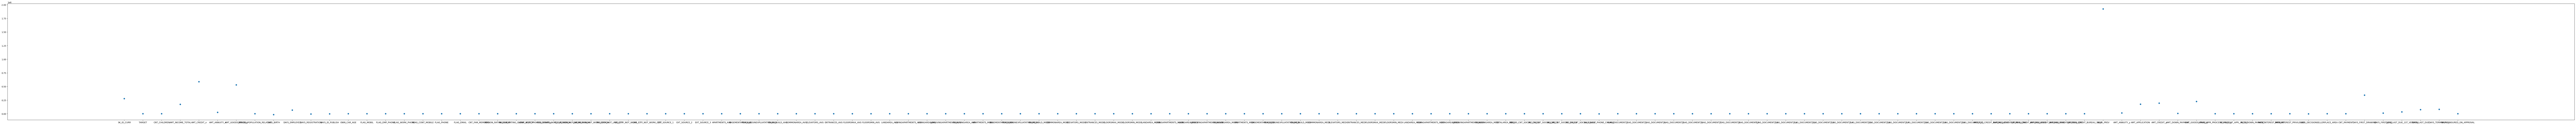

In [14]:
from matplotlib.pyplot import figure
figure(figsize=(220, 10))
plt.scatter(df_application.describe().columns, df_application.describe().loc['mean'])

In [15]:
df_application['TARGET'].value_counts()

TARGET
0    1306815
1     123340
Name: count, dtype: int64

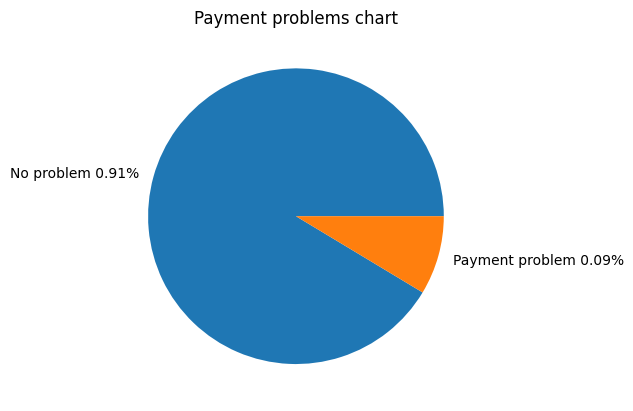

In [16]:
sizes = df_application['TARGET'].value_counts().to_list()
labels = f'No problem {sizes[0] / sum(sizes):.2f}%', f'Payment problem {sizes[1] / sum(sizes):.2f}%'
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.title('Payment problems chart')
plt.show()

# Analysis of categorical values 👈

In [17]:
df_obj = df_application.select_dtypes(include='object')

In [18]:
print(len(df_obj.columns))

32


In [19]:
df_obj.isnull().sum()

NAME_CONTRACT_TYPE_x                 0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
NAME_TYPE_SUITE_x                 4031
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
OCCUPATION_TYPE                 462731
WEEKDAY_APPR_PROCESS_START_x         0
ORGANIZATION_TYPE                    0
FONDKAPREMONT_MODE              974383
HOUSETYPE_MODE                  710772
WALLSMATERIAL_MODE              720049
EMERGENCYSTATE_MODE             671472
NAME_CONTRACT_TYPE_y             16454
WEEKDAY_APPR_PROCESS_START_y     16454
FLAG_LAST_APPL_PER_CONTRACT      16454
NAME_CASH_LOAN_PURPOSE           16454
NAME_CONTRACT_STATUS             16454
NAME_PAYMENT_TYPE                16454
CODE_REJECT_REASON               16454
NAME_TYPE_SUITE_y               711126
NAME_CLIENT_TYPE                 16454
NAME_GOODS_CATEGORY      

In [20]:
df_obj.head()

,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_x,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,NAME_CONTRACT_TYPE_y,WEEKDAY_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,Consumer loans,SATURDAY,Y,XAP,Approved,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal,POS other with interest
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,Cash loans,FRIDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low
2,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,Consumer loans,SUNDAY,Y,XAP,Approved,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest
3,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,middle,POS household with interest
4,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN,Consumer loans,FRIDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,Connectivity,middle,POS mobile without interest


In [21]:
for i in df_obj.columns:
  print(i, df_obj[i].value_counts().index.to_list(), sep='-----------👈')

NAME_CONTRACT_TYPE_x-----------👈['Cash loans', 'Revolving loans']
CODE_GENDER-----------👈['F', 'M', 'XNA']
FLAG_OWN_CAR-----------👈['N', 'Y']
FLAG_OWN_REALTY-----------👈['Y', 'N']
NAME_TYPE_SUITE_x-----------👈['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_B', 'Other_A', 'Group of people']
NAME_INCOME_TYPE-----------👈['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Unemployed', 'Student', 'Maternity leave', 'Businessman']
NAME_EDUCATION_TYPE-----------👈['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
NAME_FAMILY_STATUS-----------👈['Married', 'Single / not married', 'Civil marriage', 'Separated', 'Widow', 'Unknown']
NAME_HOUSING_TYPE-----------👈['House / apartment', 'With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment']
OCCUPATION_TYPE-----------👈['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'High skill tech staff', 'Accountant

# % of organization type that have problems with payment

In [22]:
df = df_application


# All categorical types - limit to 10 greatest values 👈 % of organization type that have problems with payment

NAME_CONTRACT_TYPE_x-----------👈['Cash loans', 'Revolving loans']


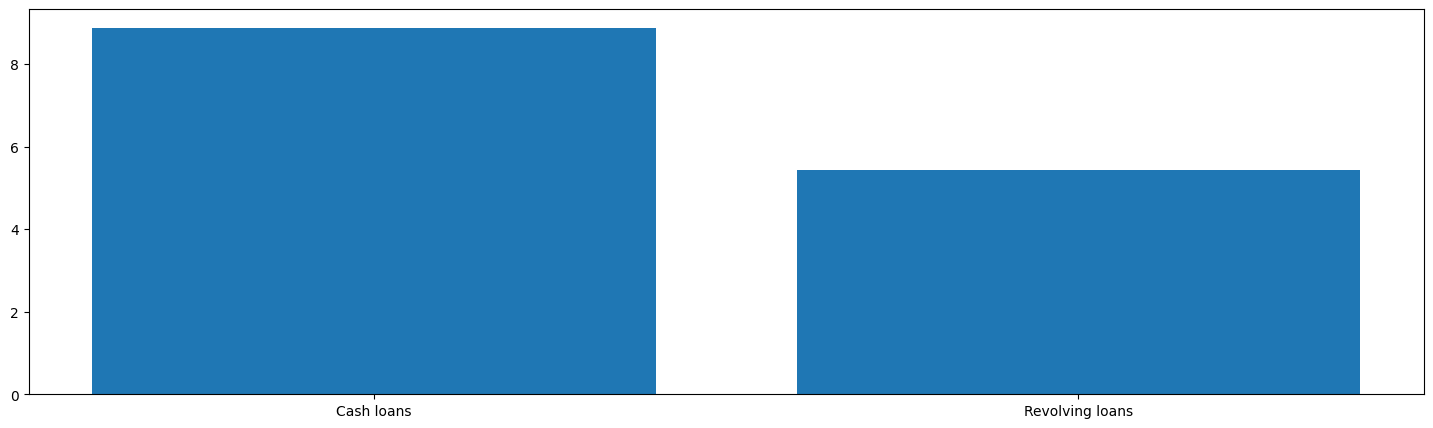






CODE_GENDER-----------👈['F', 'M', 'XNA']


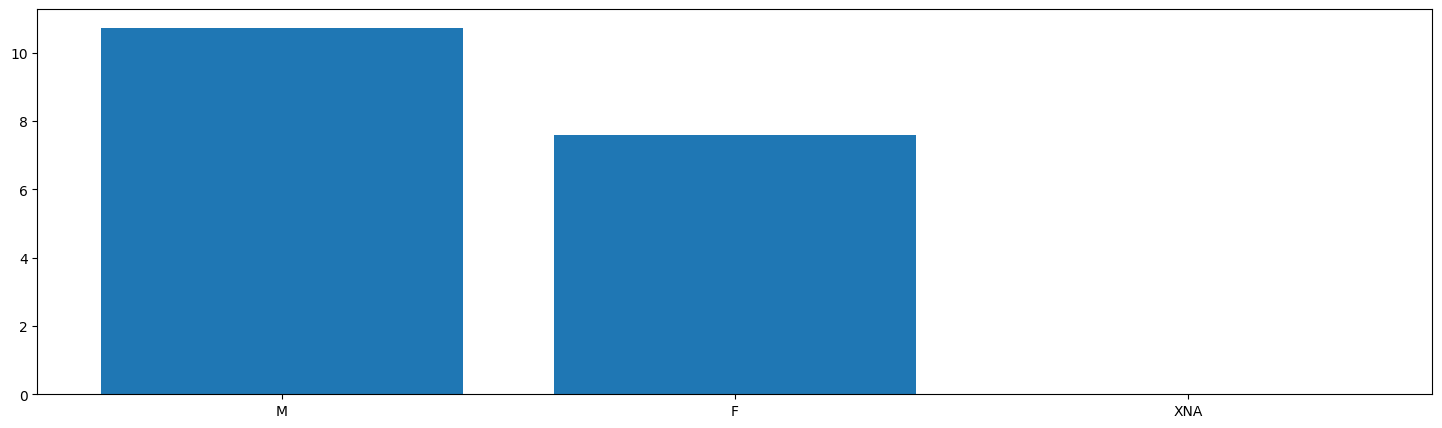






FLAG_OWN_CAR-----------👈['N', 'Y']


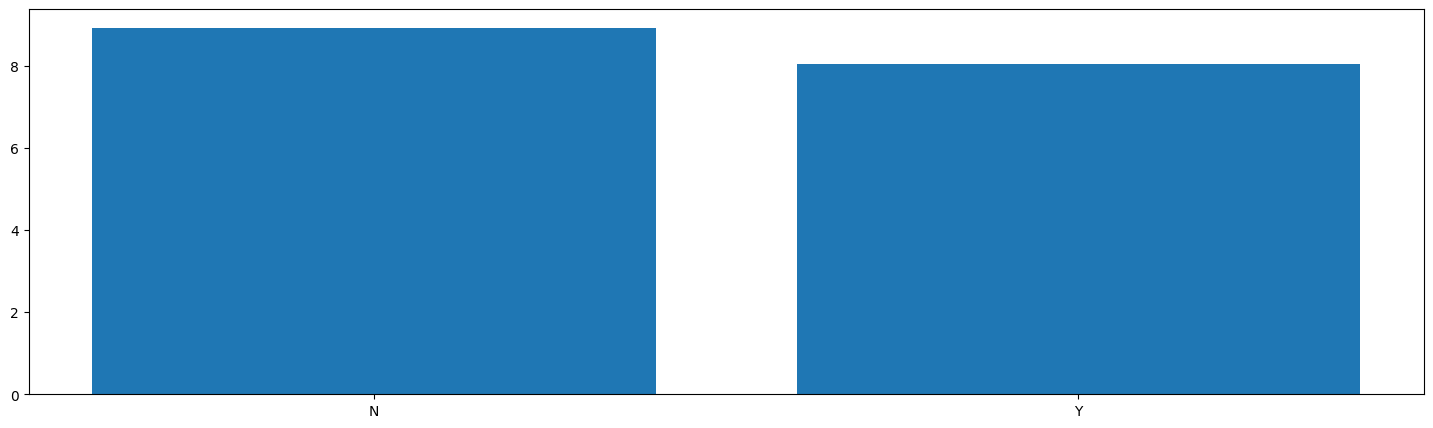






FLAG_OWN_REALTY-----------👈['Y', 'N']


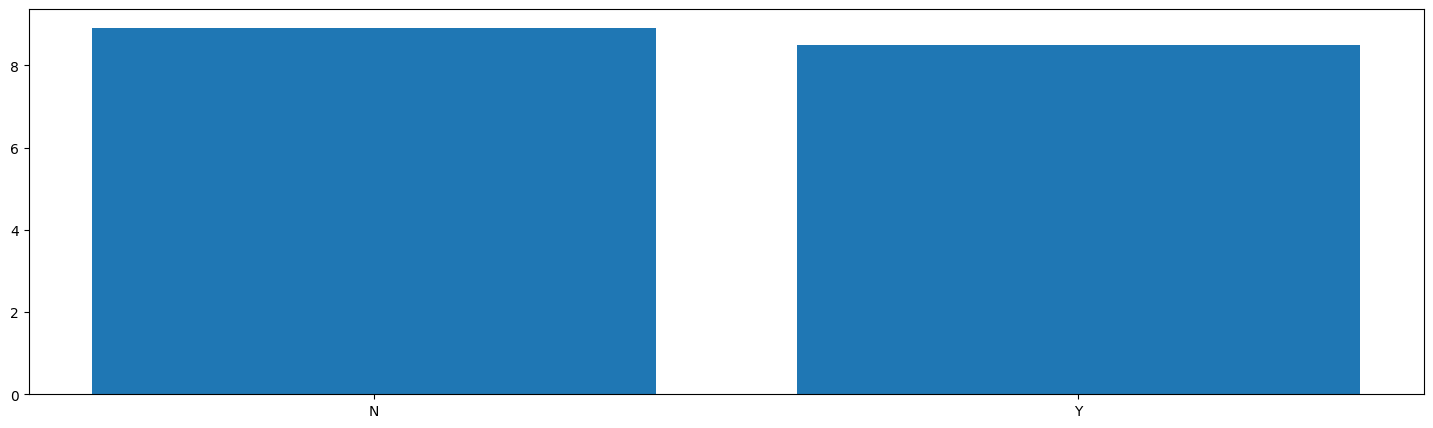






NAME_TYPE_SUITE_x-----------👈['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_B', 'Other_A', 'Group of people']


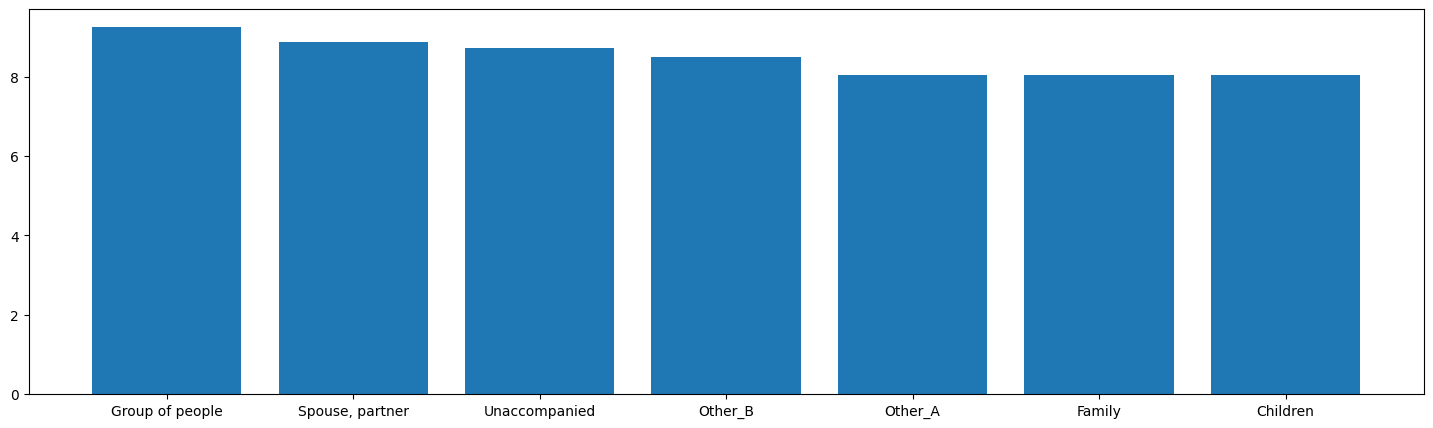






NAME_INCOME_TYPE-----------👈['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Unemployed', 'Student', 'Maternity leave', 'Businessman']


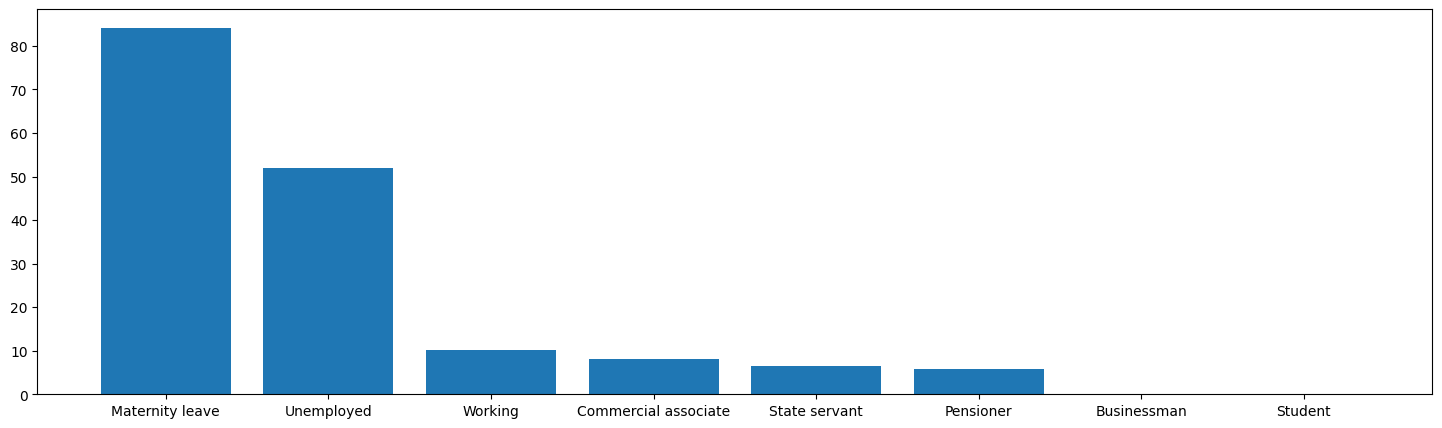






NAME_EDUCATION_TYPE-----------👈['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']


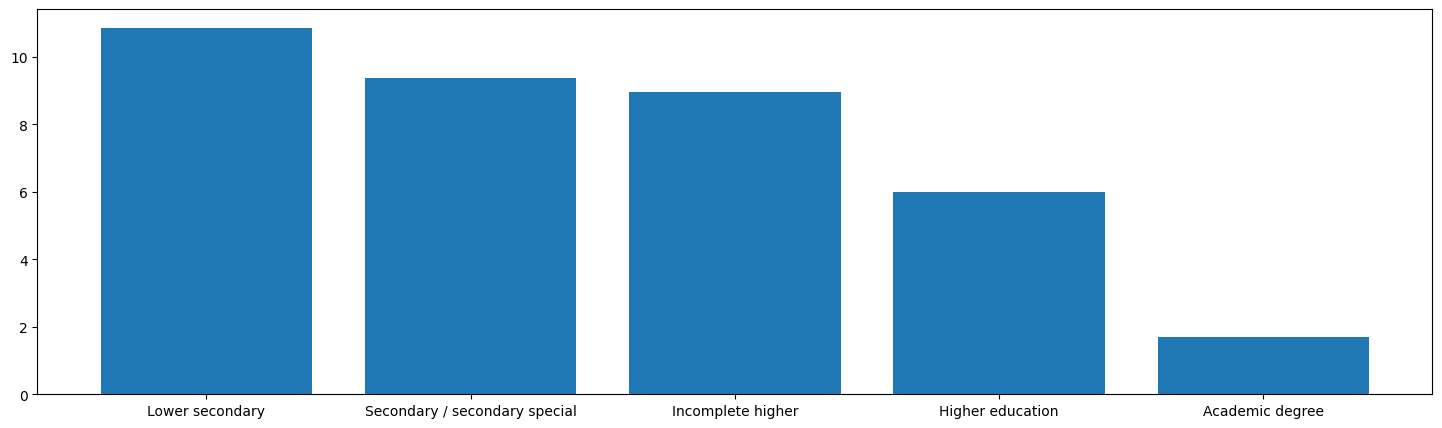






NAME_FAMILY_STATUS-----------👈['Married', 'Single / not married', 'Civil marriage', 'Separated', 'Widow', 'Unknown']


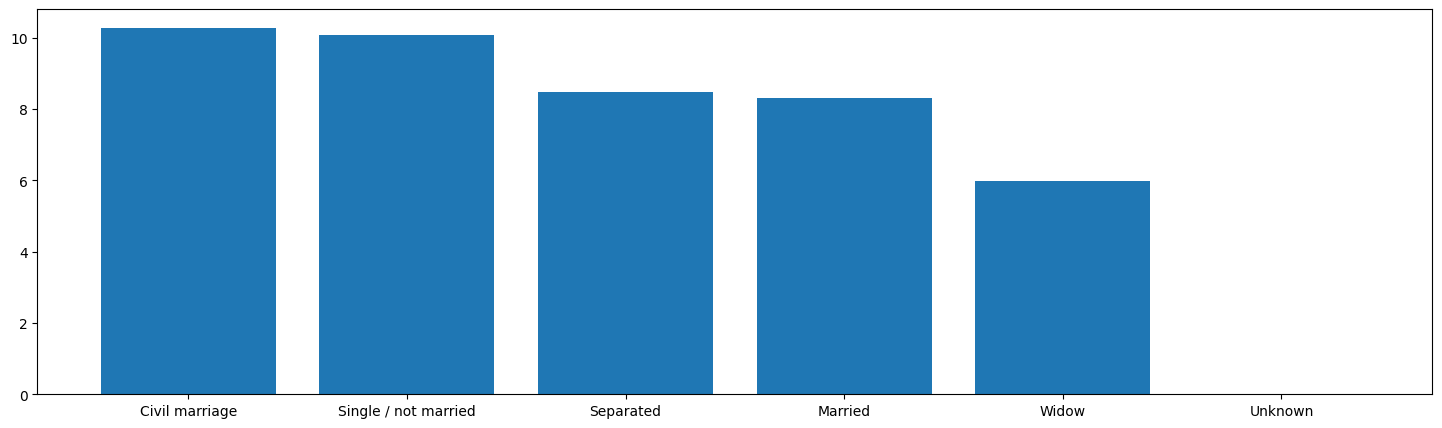






NAME_HOUSING_TYPE-----------👈['House / apartment', 'With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment']


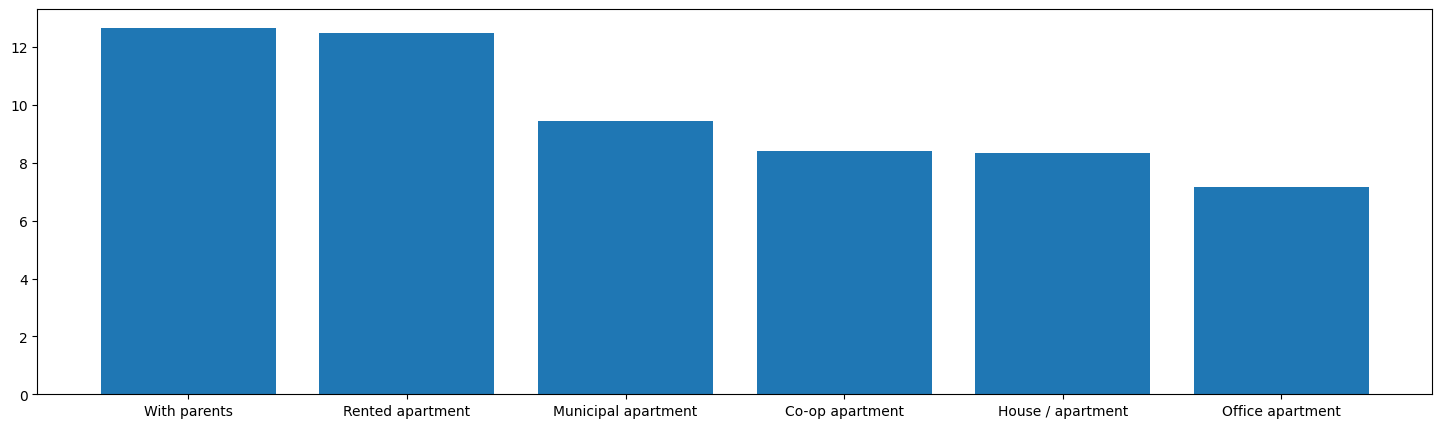






OCCUPATION_TYPE-----------👈['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'High skill tech staff', 'Accountants', 'Medicine staff', 'Security staff', 'Cooking staff', 'Cleaning staff', 'Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff', 'Secretaries', 'Realty agents', 'HR staff', 'IT staff']


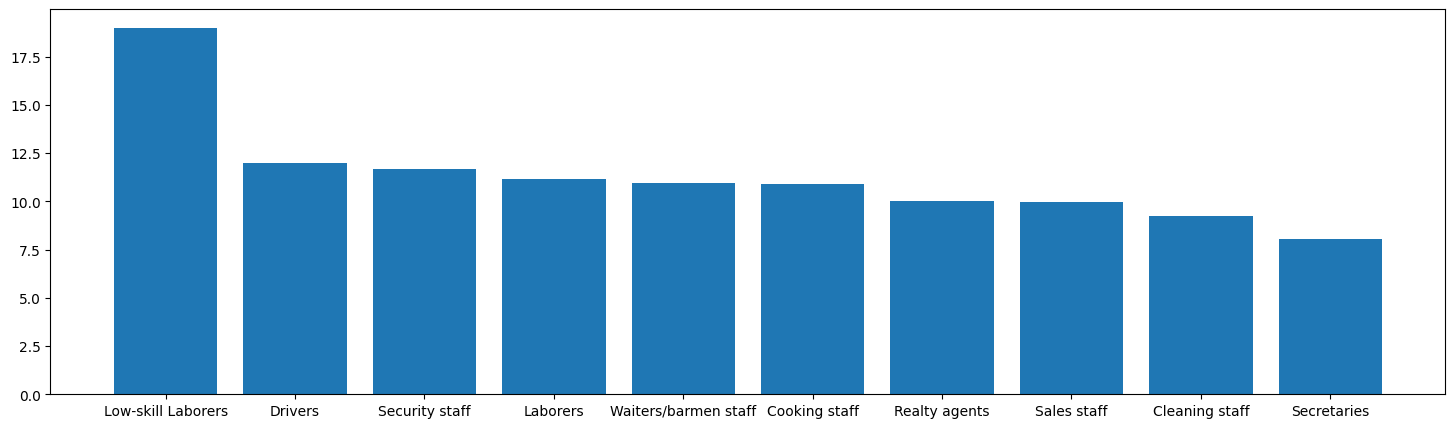






WEEKDAY_APPR_PROCESS_START_x-----------👈['TUESDAY', 'WEDNESDAY', 'MONDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']


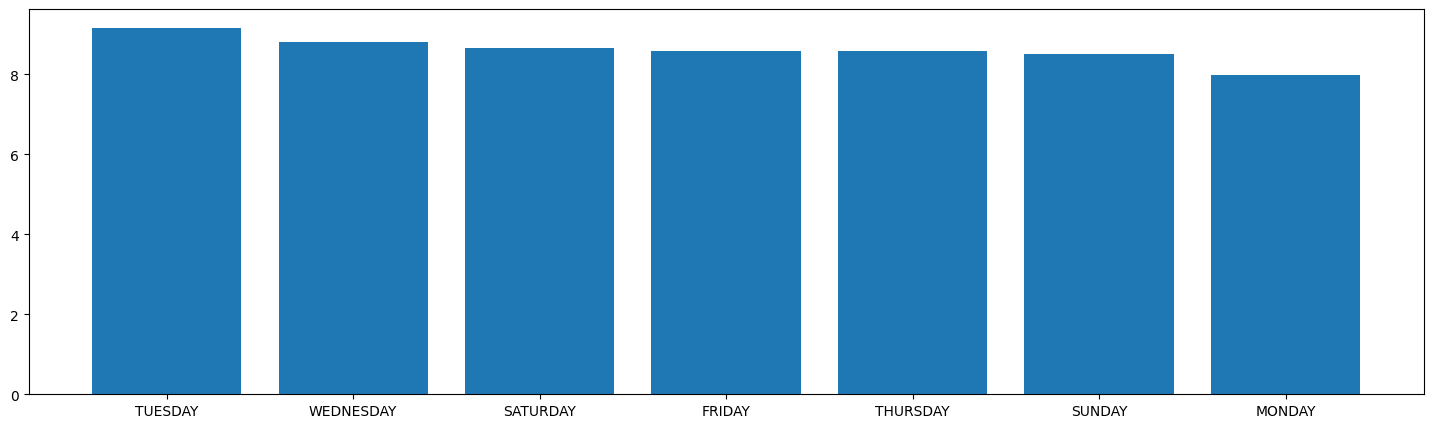






ORGANIZATION_TYPE-----------👈['Business Entity Type 3', 'XNA', 'Self-employed', 'Other', 'Medicine', 'Business Entity Type 2', 'Government', 'School', 'Trade: type 7', 'Kindergarten', 'Construction', 'Business Entity Type 1', 'Transport: type 4', 'Security', 'Industry: type 3', 'Industry: type 9', 'Trade: type 3', 'Housing', 'Industry: type 11', 'Military', 'Trade: type 2', 'Bank', 'Agriculture', 'Police', 'Postal', 'Transport: type 2', 'Security Ministries', 'Restaurant', 'Services', 'Industry: type 7', 'University', 'Transport: type 3', 'Industry: type 1', 'Hotel', 'Electricity', 'Industry: type 4', 'Industry: type 5', 'Trade: type 6', 'Insurance', 'Telecom', 'Emergency', 'Industry: type 2', 'Realtor', 'Advertising', 'Industry: type 12', 'Culture', 'Trade: type 1', 'Mobile', 'Cleaning', 'Legal Services', 'Transport: type 1', 'Industry: type 10', 'Industry: type 6', 'Religion', 'Trade: type 4', 'Industry: type 13', 'Trade: type 5', 'Industry: type 8']


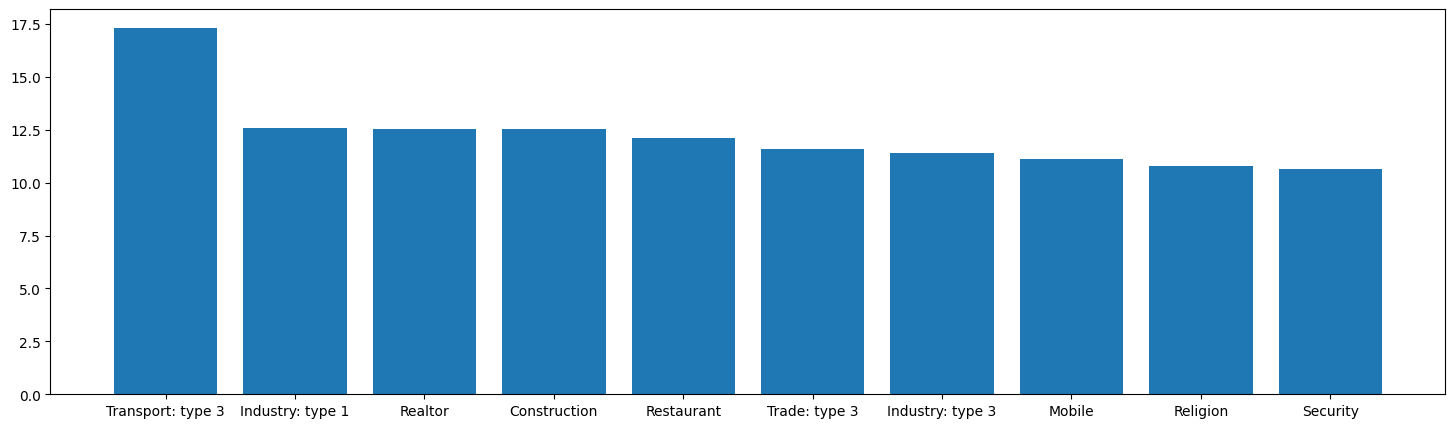






FONDKAPREMONT_MODE-----------👈['reg oper account', 'reg oper spec account', 'not specified', 'org spec account']


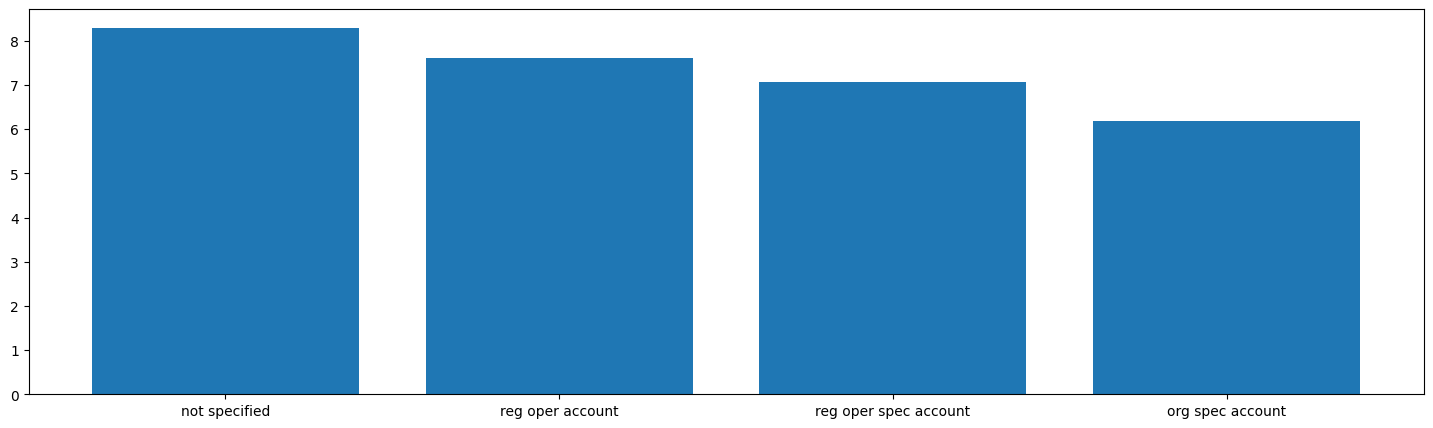






HOUSETYPE_MODE-----------👈['block of flats', 'specific housing', 'terraced house']


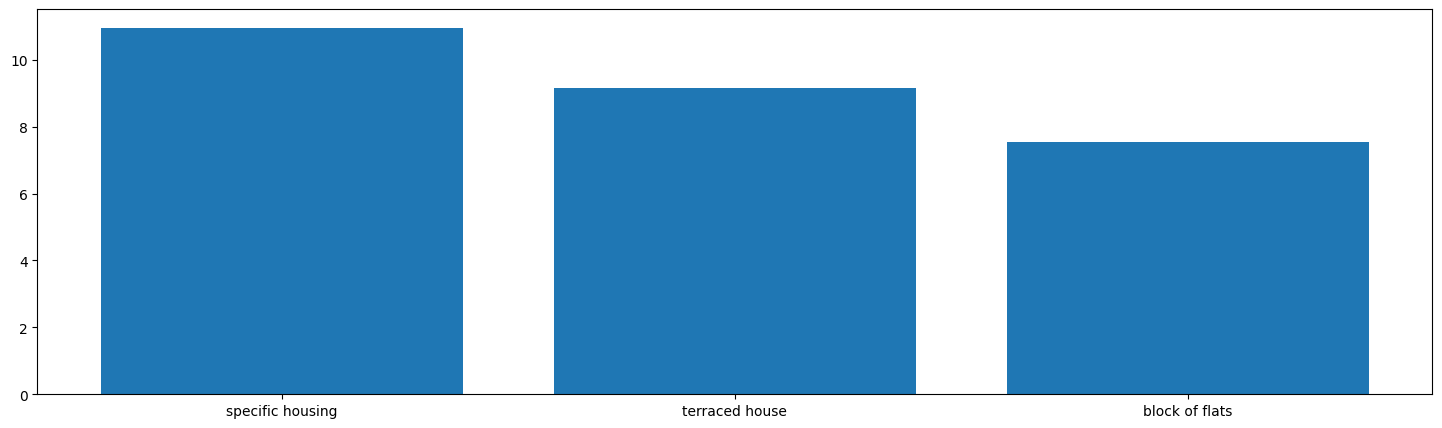






WALLSMATERIAL_MODE-----------👈['Panel', 'Stone, brick', 'Block', 'Wooden', 'Mixed', 'Others', 'Monolithic']


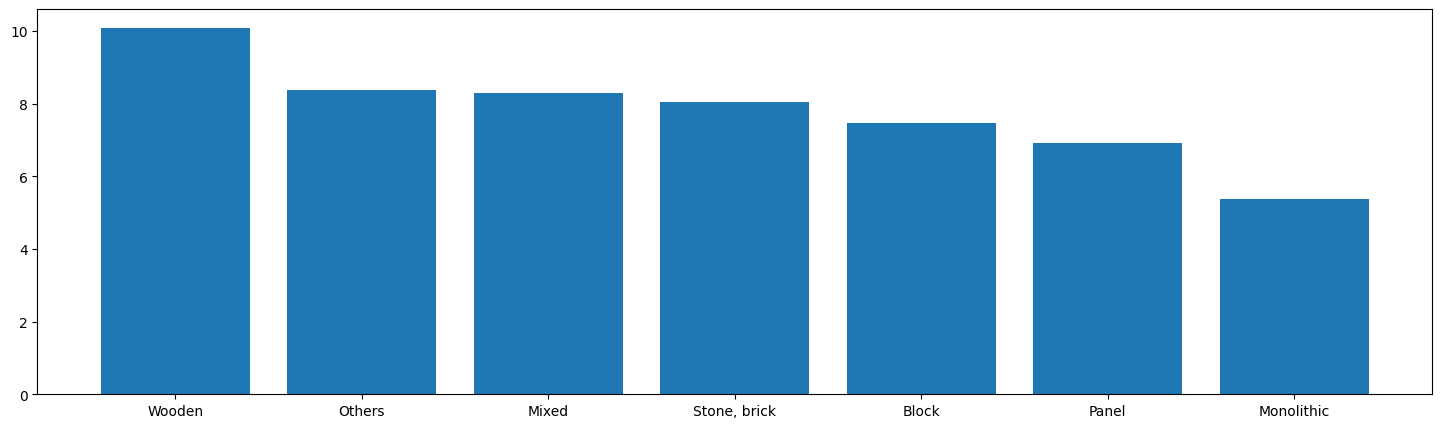






EMERGENCYSTATE_MODE-----------👈['No', 'Yes']


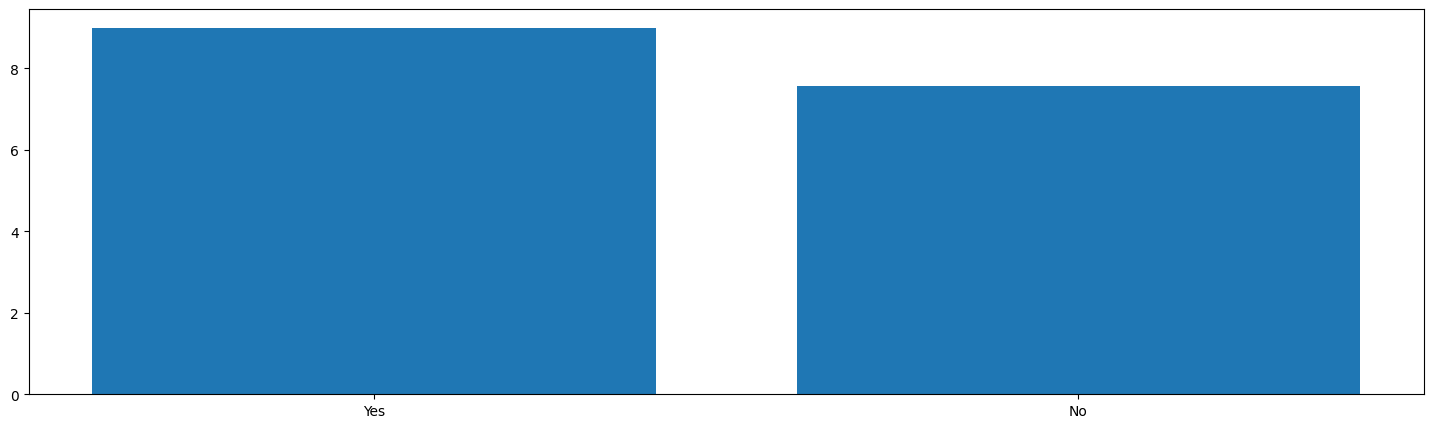






NAME_CONTRACT_TYPE_y-----------👈['Cash loans', 'Consumer loans', 'Revolving loans', 'XNA']


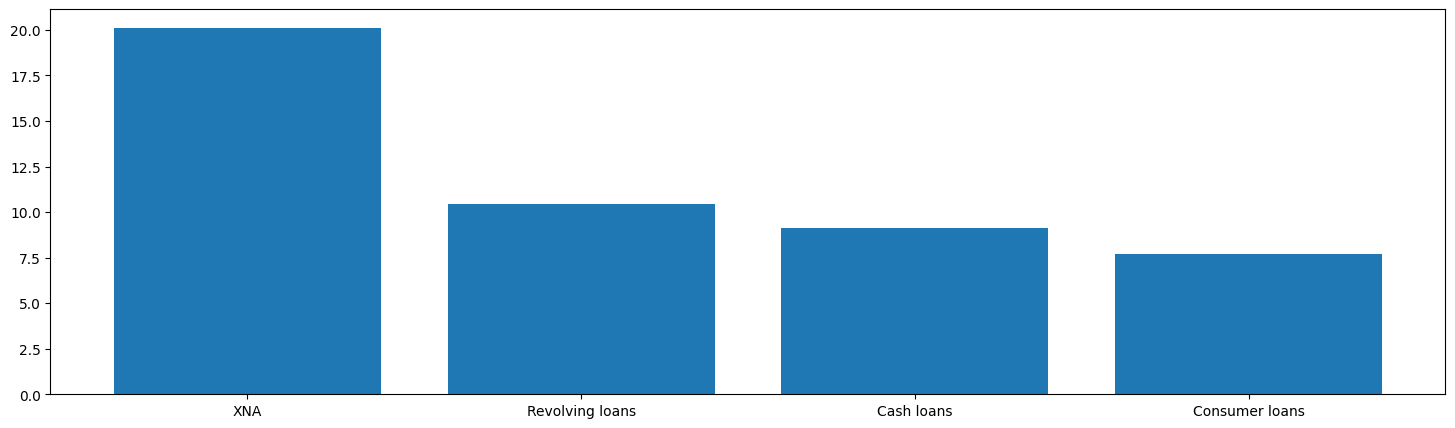






WEEKDAY_APPR_PROCESS_START_y-----------👈['WEDNESDAY', 'TUESDAY', 'MONDAY', 'FRIDAY', 'THURSDAY', 'SATURDAY', 'SUNDAY']


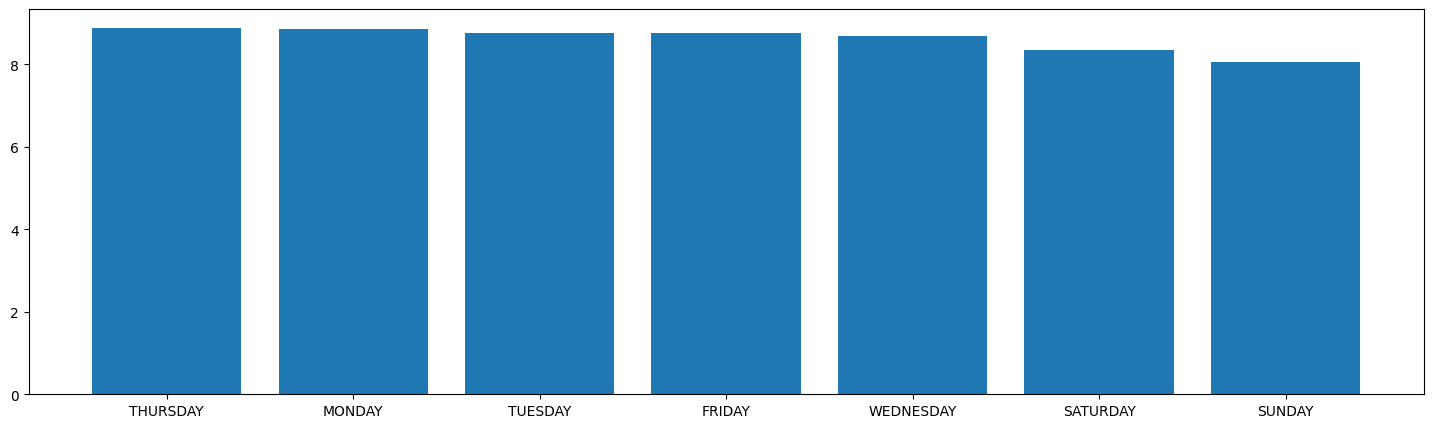






FLAG_LAST_APPL_PER_CONTRACT-----------👈['Y', 'N']


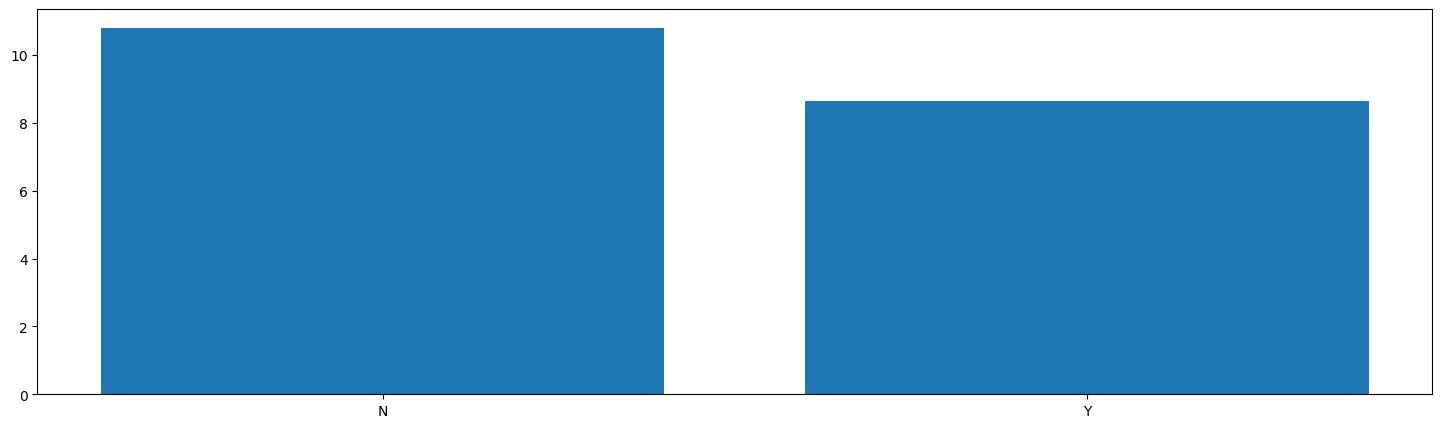






NAME_CASH_LOAN_PURPOSE-----------👈['XAP', 'XNA', 'Repairs', 'Other', 'Urgent needs', 'Buying a used car', 'Building a house or an annex', 'Everyday expenses', 'Medicine', 'Payments on other loans', 'Education', 'Journey', 'Purchase of electronic equipment', 'Buying a new car', 'Wedding / gift / holiday', 'Buying a home', 'Car repairs', 'Furniture', 'Buying a holiday home / land', 'Business development', 'Gasification / water supply', 'Buying a garage', 'Hobby', 'Money for a third person', 'Refusal to name the goal']


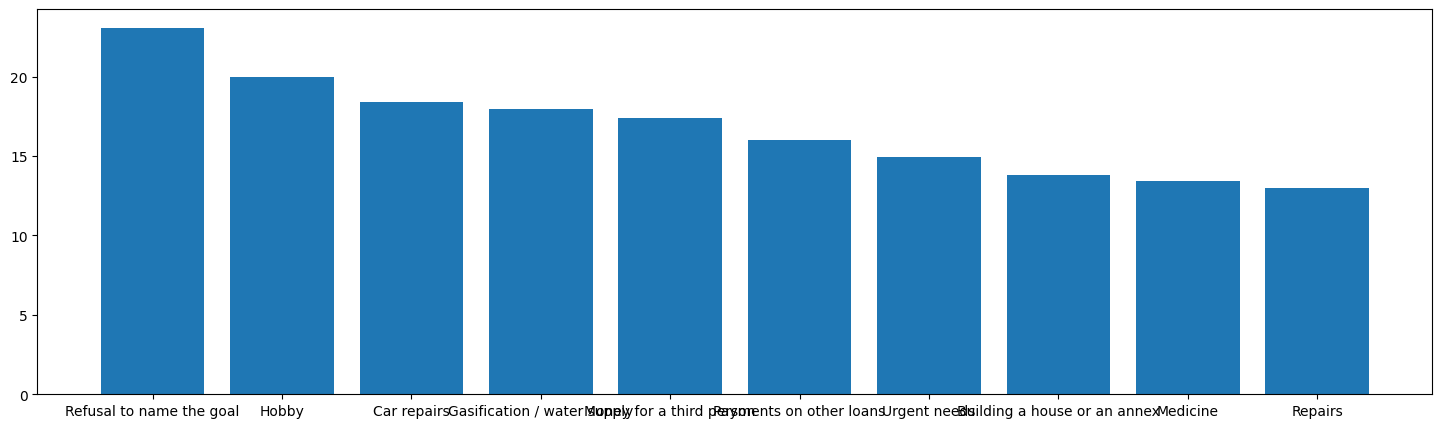






NAME_CONTRACT_STATUS-----------👈['Approved', 'Canceled', 'Refused', 'Unused offer']


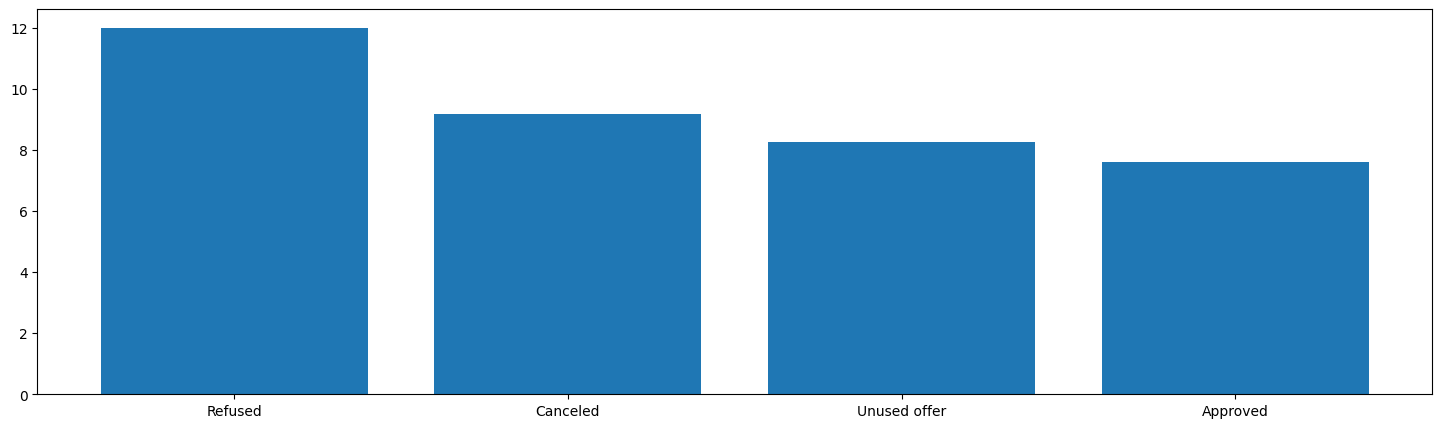






NAME_PAYMENT_TYPE-----------👈['Cash through the bank', 'XNA', 'Non-cash from your account', 'Cashless from the account of the employer']


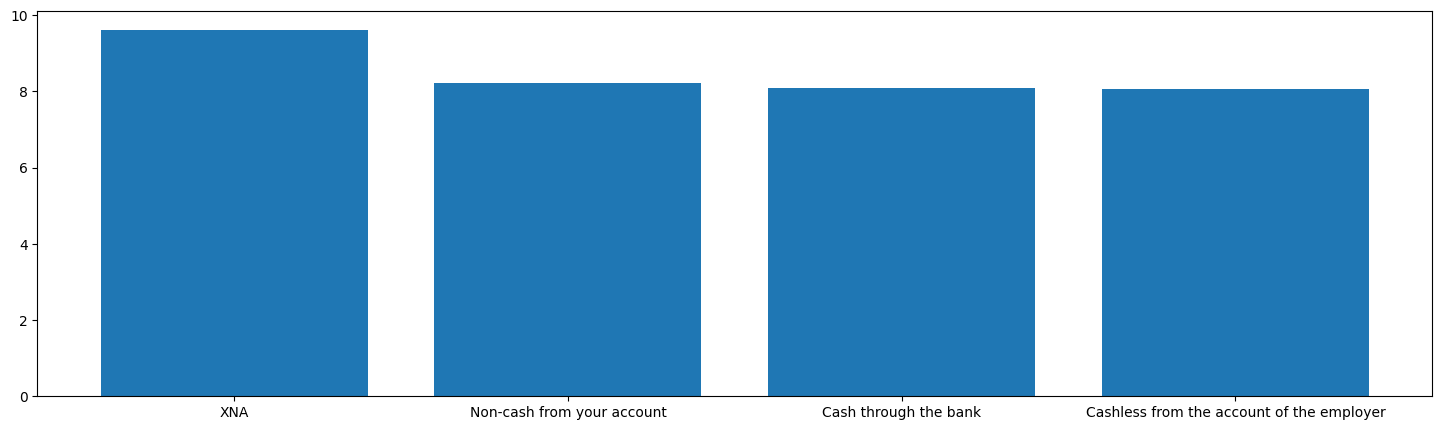






CODE_REJECT_REASON-----------👈['XAP', 'HC', 'LIMIT', 'SCO', 'CLIENT', 'SCOFR', 'XNA', 'VERIF', 'SYSTEM']


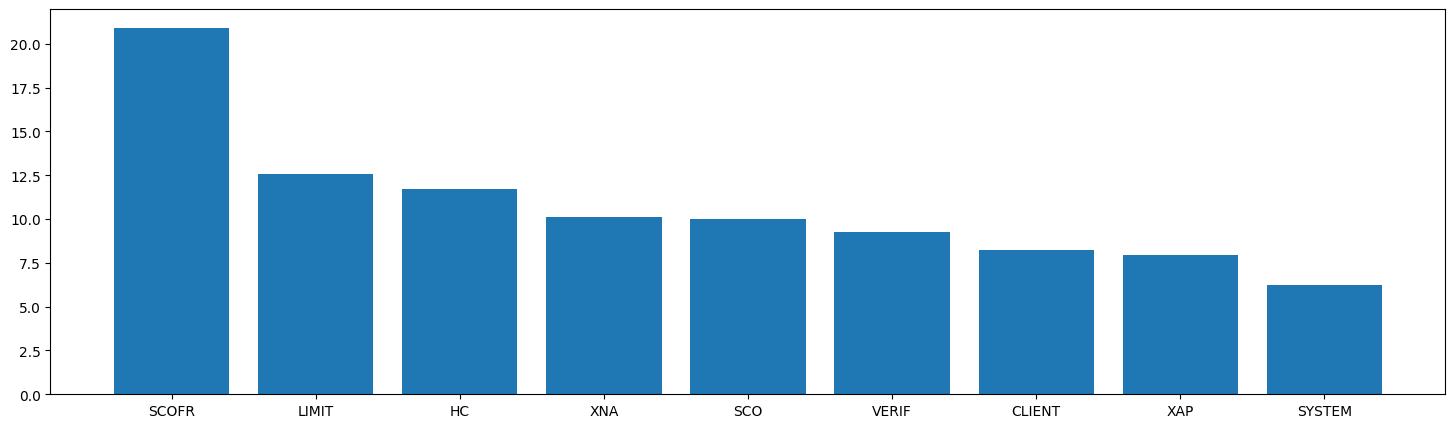






NAME_TYPE_SUITE_y-----------👈['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_B', 'Other_A', 'Group of people']


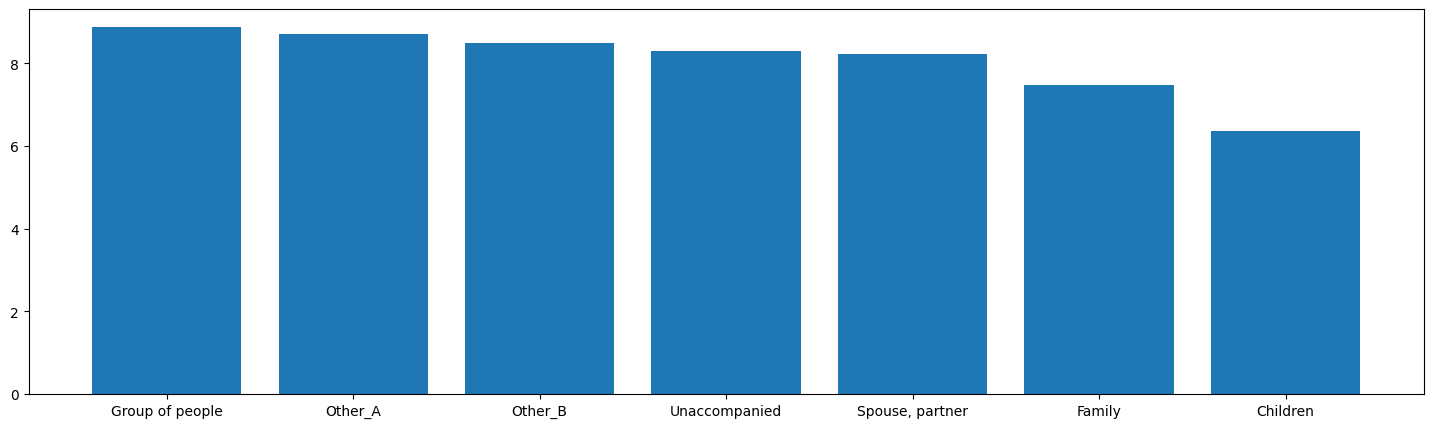






NAME_CLIENT_TYPE-----------👈['Repeater', 'New', 'Refreshed', 'XNA']


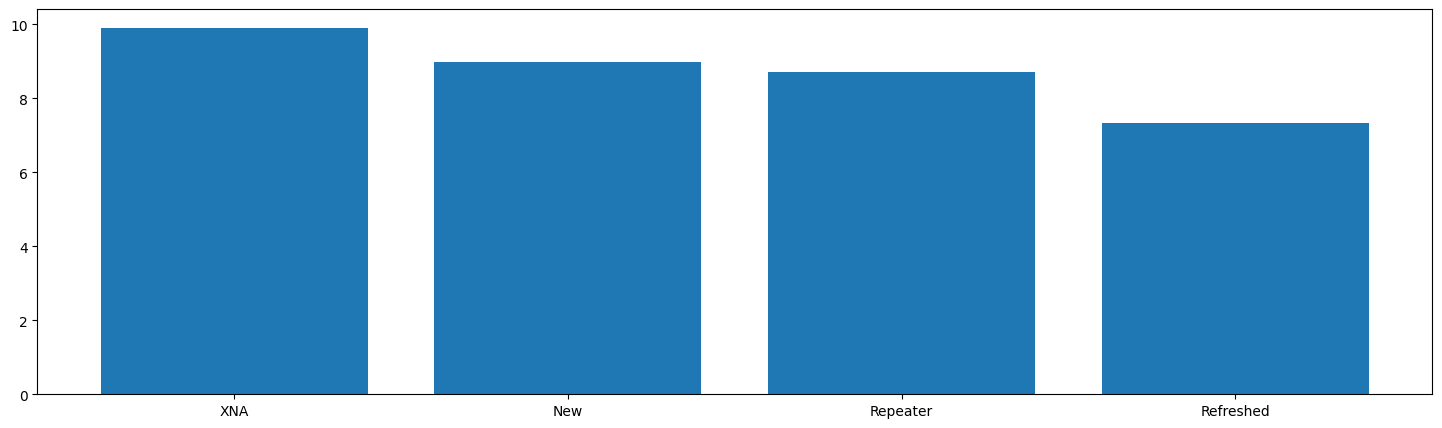






NAME_GOODS_CATEGORY-----------👈['XNA', 'Mobile', 'Consumer Electronics', 'Computers', 'Audio/Video', 'Furniture', 'Photo / Cinema Equipment', 'Construction Materials', 'Clothing and Accessories', 'Auto Accessories', 'Jewelry', 'Homewares', 'Medical Supplies', 'Vehicles', 'Sport and Leisure', 'Other', 'Gardening', 'Office Appliances', 'Tourism', 'Medicine', 'Direct Sales', 'Fitness', 'Additional Service', 'Education', 'Weapon', 'Insurance', 'Animals']


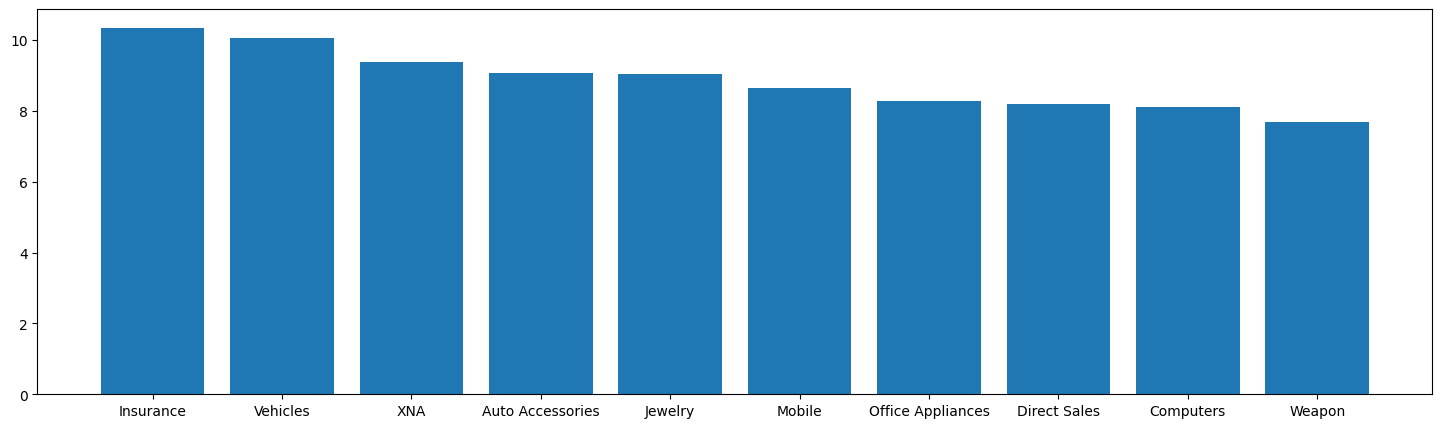






NAME_PORTFOLIO-----------👈['POS', 'Cash', 'XNA', 'Cards', 'Cars']


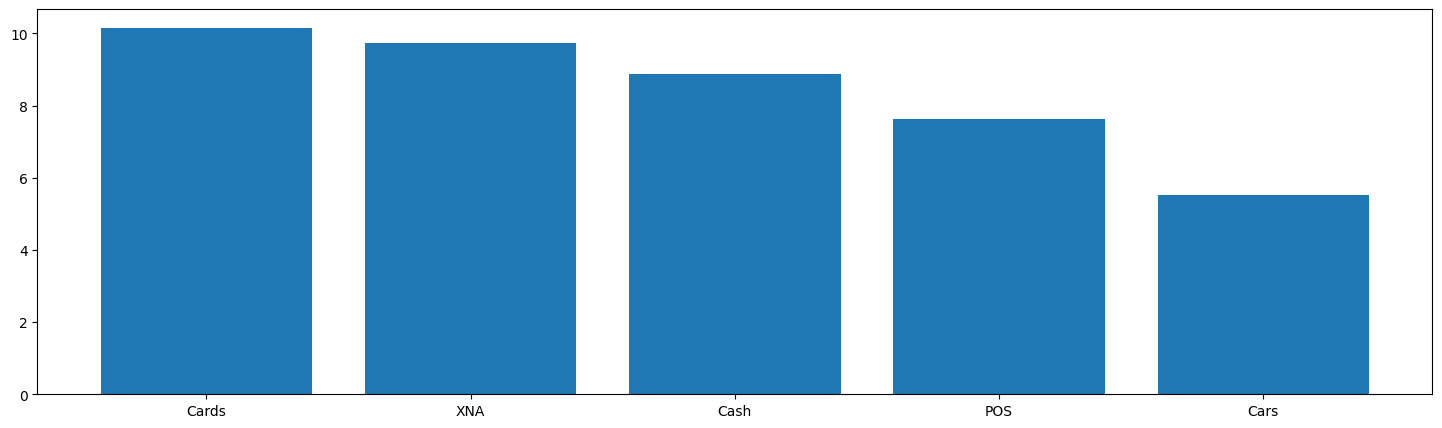






NAME_PRODUCT_TYPE-----------👈['XNA', 'x-sell', 'walk-in']


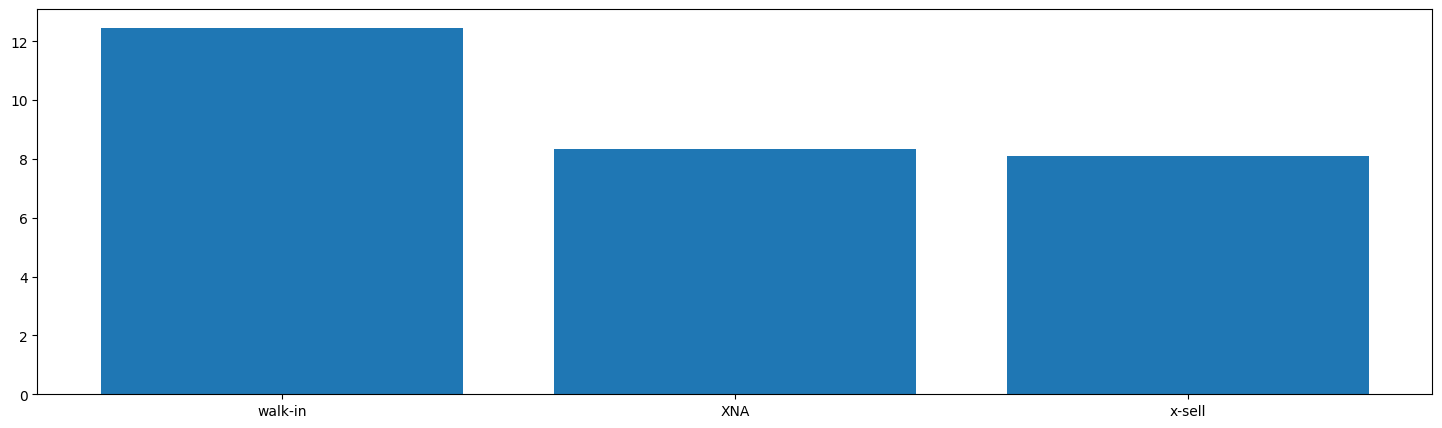






CHANNEL_TYPE-----------👈['Credit and cash offices', 'Country-wide', 'Stone', 'Regional / Local', 'Contact center', 'AP+ (Cash loan)', 'Channel of corporate sales', 'Car dealer']


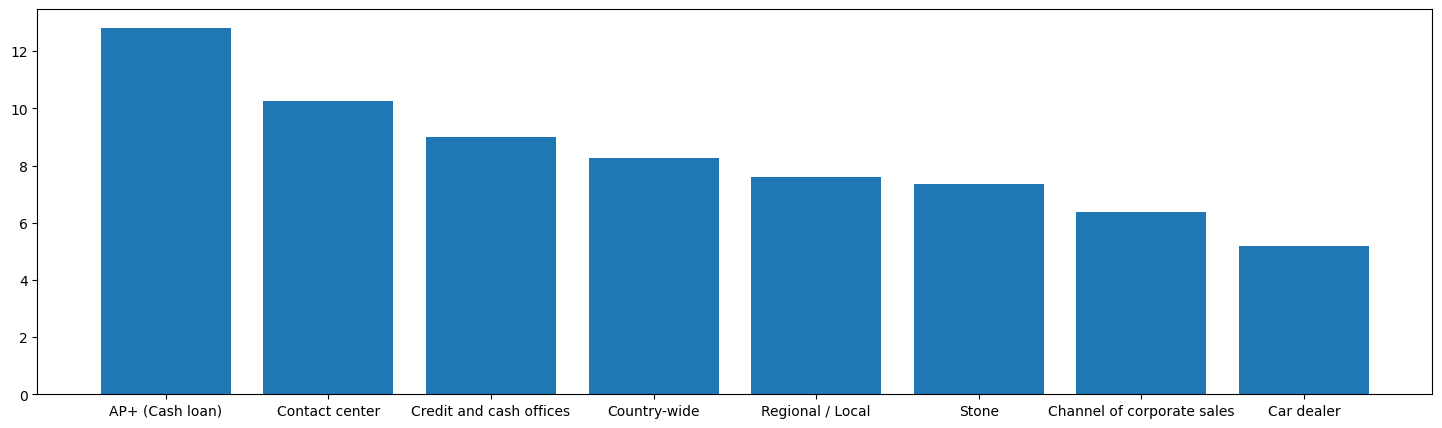






NAME_SELLER_INDUSTRY-----------👈['XNA', 'Consumer electronics', 'Connectivity', 'Furniture', 'Construction', 'Clothing', 'Industry', 'Auto technology', 'Jewelry', 'MLM partners', 'Tourism']


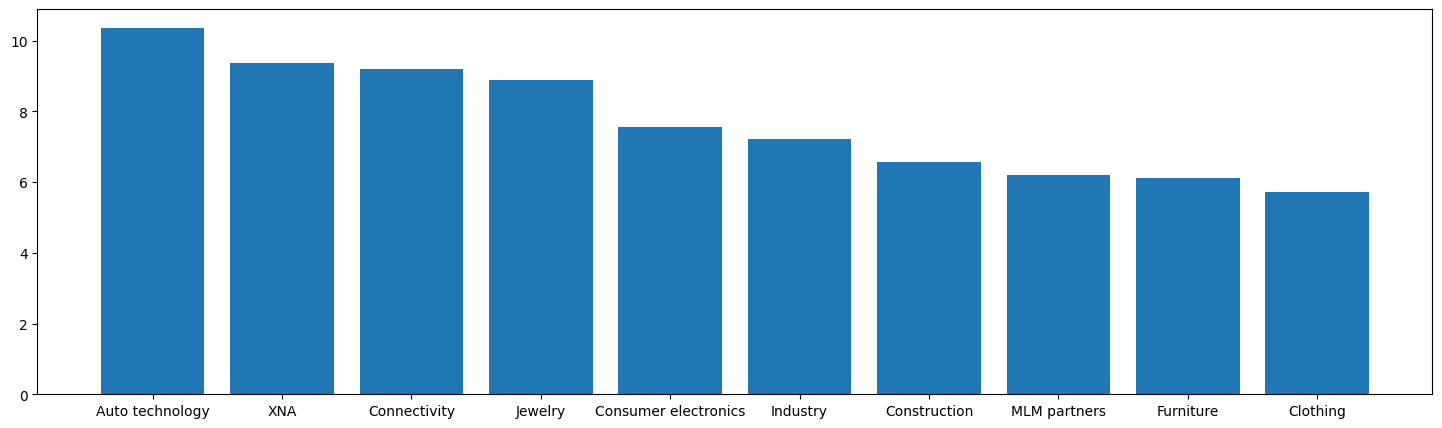






NAME_YIELD_GROUP-----------👈['XNA', 'middle', 'high', 'low_normal', 'low_action']


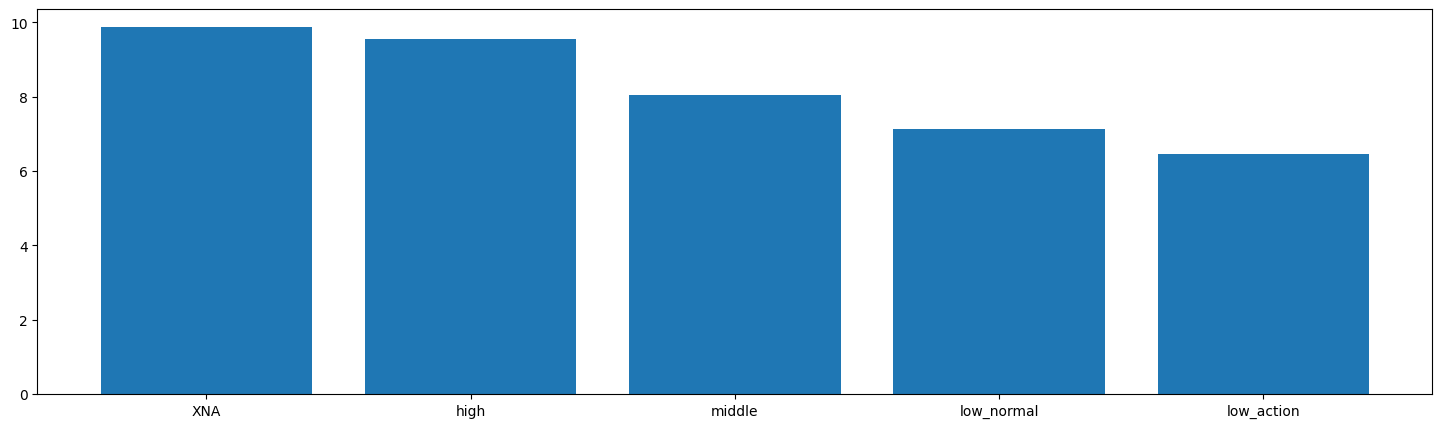






PRODUCT_COMBINATION-----------👈['Cash', 'POS household with interest', 'POS mobile with interest', 'Cash X-Sell: middle', 'Cash X-Sell: low', 'Card Street', 'POS industry with interest', 'POS household without interest', 'Card X-Sell', 'Cash Street: high', 'Cash X-Sell: high', 'Cash Street: middle', 'Cash Street: low', 'POS other with interest', 'POS mobile without interest', 'POS industry without interest', 'POS others without interest']


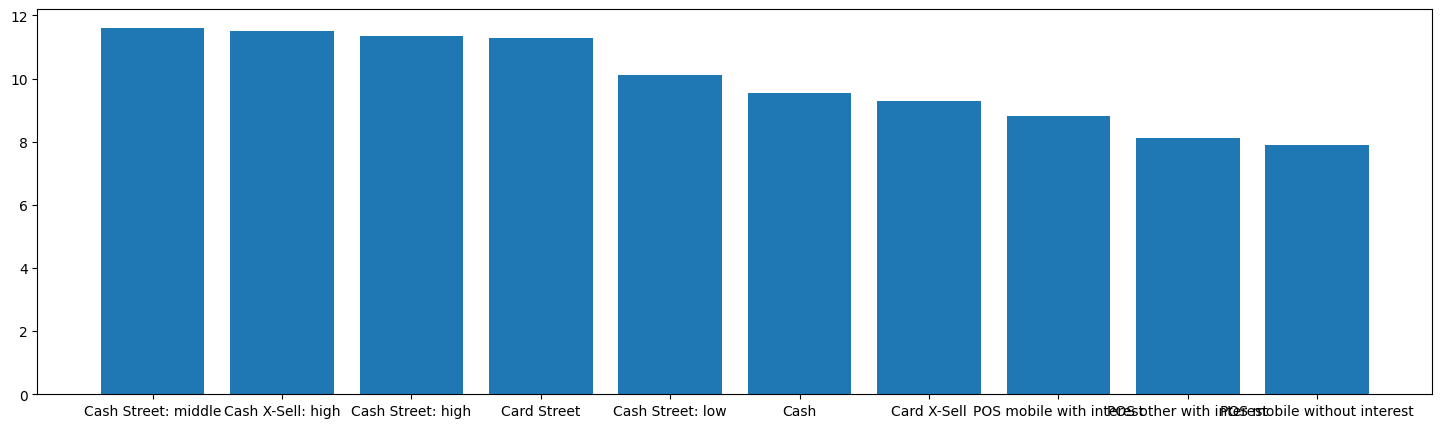

In [23]:
for i in df_obj.columns:
  figure(figsize=(18, 5))
  print(i, df_obj[i].value_counts().index.to_list(), sep='-----------👈')

  df_org_type = df.groupby(f'{i}')['TARGET'].sum()  / (df_obj[f'{i}'].value_counts()) * 100
  df_org_type.sort_values(ascending=False)
  plt.bar(df_org_type.sort_values(ascending=False).index[:10], df_org_type.sort_values(ascending=False)[:10])
  plt.show()
  print("\n\n\n\n")

# Analysis of numerical values 👈

In [24]:
df_num = df_application.select_dtypes(include='number')
df_num.head(0)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL


In [25]:
print(len(df_num.columns))

126


In [26]:
pos = df_num.corr()['TARGET'].sort_values(ascending=False)[:5]
pos

TARGET                         1.000000
DAYS_BIRTH                     0.074314
REGION_RATING_CLIENT_W_CITY    0.059832
DAYS_LAST_PHONE_CHANGE         0.058110
REGION_RATING_CLIENT           0.057135
Name: TARGET, dtype: float64

In [27]:
neg = df_num.corr()['TARGET'].sort_values(ascending=True)[:5]
neg

EXT_SOURCE_3    -0.188381
EXT_SOURCE_2    -0.155211
EXT_SOURCE_1    -0.153187
DAYS_EMPLOYED   -0.047409
FLOORSMAX_AVG   -0.041886
Name: TARGET, dtype: float64

In [28]:
# figure(figsize=(25, 25))
# sns.heatmap(df_num.corr())

# Model data preparation

In [29]:
df_ML = df_application[list(pos.index) + list(neg.index) + list(df_obj.columns)]
df_ML

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_EMPLOYED,FLOORSMAX_AVG,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_x,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,NAME_CONTRACT_TYPE_y,WEEKDAY_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1,-9461,2,-1134.0,2,0.139376,0.262949,0.083037,-637,0.0833,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,Consumer loans,SATURDAY,Y,XAP,Approved,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal,POS other with interest
1,0,-16765,1,-828.0,1,NaN,0.622246,0.311267,-1188,0.2917,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,Cash loans,FRIDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low
2,0,-16765,1,-828.0,1,NaN,0.622246,0.311267,-1188,0.2917,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,Consumer loans,SUNDAY,Y,XAP,Approved,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest
3,0,-16765,1,-828.0,1,NaN,0.622246,0.311267,-1188,0.2917,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,middle,POS household with interest
4,0,-19046,2,-815.0,2,0.729567,0.555912,NaN,-225,NaN,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN,Consumer loans,FRIDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,Connectivity,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430150,0,-16856,1,-787.0,1,0.113922,0.708569,0.734460,-1262,0.3750,Cash loans,F,N,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,NaN,block of flats,Panel,No,Cash loans,THURSDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
1430151,0,-16856,1,-787.0,1,0.113922,0.708569,0.734460,-1262,0.3750,Cash loans,F,N,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,NaN,block of flats,Panel,No,Revolving loans,SUNDAY,Y,XAP,Refused,XNA,HC,Unaccompanied,Repeater,XNA,Cards,walk-in,Country-wide,Connectivity,XNA,Card Street
1430152,0,-16856,1,-787.0,1,0.113922,0.708569,0.734460,-1262,0.3750,Cash loans,F,N,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,NaN,block of flats,Panel,No,Cash loans,FRIDAY,Y,Repairs,Refused,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,low_normal,Cash Street: low
1430153,0,-16856,1,-787.0,1,0.113922,0.708569,0.734460,-1262,0.3750,Cash loans,F,N,N,Unaccompanied,Co

In [30]:
df_ML.isnull().sum().sort_values(ascending=False)

FONDKAPREMONT_MODE              974383
EXT_SOURCE_1                    806398
WALLSMATERIAL_MODE              720049
NAME_TYPE_SUITE_y               711126
HOUSETYPE_MODE                  710772
FLOORSMAX_AVG                   705019
EMERGENCYSTATE_MODE             671472
OCCUPATION_TYPE                 462731
EXT_SOURCE_3                    245619
PRODUCT_COMBINATION              16767
FLAG_LAST_APPL_PER_CONTRACT      16454
NAME_CASH_LOAN_PURPOSE           16454
NAME_CONTRACT_STATUS             16454
NAME_PAYMENT_TYPE                16454
CODE_REJECT_REASON               16454
NAME_CLIENT_TYPE                 16454
WEEKDAY_APPR_PROCESS_START_y     16454
NAME_GOODS_CATEGORY              16454
NAME_PORTFOLIO                   16454
NAME_PRODUCT_TYPE                16454
CHANNEL_TYPE                     16454
NAME_SELLER_INDUSTRY             16454
NAME_YIELD_GROUP                 16454
NAME_CONTRACT_TYPE_y             16454
NAME_TYPE_SUITE_x                 4031
EXT_SOURCE_2             

In [31]:
df_ML['FONDKAPREMONT_MODE'].value_counts()

FONDKAPREMONT_MODE
reg oper account         346710
reg oper spec account     56156
not specified             26953
org spec account          25953
Name: count, dtype: int64

In [32]:
df_ML = df_ML.dropna()
df_ML.isnull().sum()

TARGET                          0
DAYS_BIRTH                      0
REGION_RATING_CLIENT_W_CITY     0
DAYS_LAST_PHONE_CHANGE          0
REGION_RATING_CLIENT            0
EXT_SOURCE_3                    0
EXT_SOURCE_2                    0
EXT_SOURCE_1                    0
DAYS_EMPLOYED                   0
FLOORSMAX_AVG                   0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
OCCUPATION_TYPE                 0
WEEKDAY_APPR_PROCESS_START_x    0
ORGANIZATION_TYPE               0
FONDKAPREMONT_MODE              0
HOUSETYPE_MODE                  0
WALLSMATERIAL_MODE              0
EMERGENCYSTATE_MODE             0
NAME_CONTRACT_TYPE_y            0
WEEKDAY_APPR_PROCESS_START_y    0
FLAG_LAST_APPL_PER_CONTRACT     0
NAME_CASH_LOAN

In [33]:
print(len(df_ML.columns))

42


In [34]:
df_ML_dumm = pd.get_dummies(df_ML, drop_first=True)
df_ML_dumm.head(1)

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_EMPLOYED,FLOORSMAX_AVG,NAME_CONTRACT_TYPE_x_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_x_Family,NAME_TYPE_SUITE_x_Group of people,NAME_TYPE_SUITE_x_Other_A,NAME_TYPE_SUITE_x_Other_B,"NAME_TYPE_SUITE_x_Spouse, partner",NAME_TYPE_SUITE_x_Unaccompanied,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_x_MONDAY,WEEKDAY_APPR_PROCESS_START_x_SATURDAY,WEEKDAY_APPR_PROCESS_START_x_SUNDAY,WEEKDAY_APPR_PROCESS_START_x_THURSDAY,WEEKDAY_APPR_PROCESS_START_x_TUESDAY,WEEKDAY_APPR_PROCESS_START_x_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,...,CODE_REJECT_REASON_XNA,NAME_TYPE_SUITE_y_Family,NAME_TYPE_SUITE_y_Group of people,NAME_TYPE_SUITE_y_Other_A,NAME_TYPE_SUITE_y_Other_B,"NAME_TYPE_SUITE_y_Spouse, partner",NAME_TYPE_SUITE_y_Unaccompanied,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_Medical Supplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE_Stone,NAME_SELLER_INDUSTRY_Clothing,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_Construction,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Furniture,NAME_SELLER_INDUSTRY_Industry,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,NAME_SELLER_INDUSTRY_XNA,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION

In [35]:
df_ML_dumm = df_ML_dumm.astype('float')
df_ML_dumm

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_EMPLOYED,FLOORSMAX_AVG,NAME_CONTRACT_TYPE_x_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_x_Family,NAME_TYPE_SUITE_x_Group of people,NAME_TYPE_SUITE_x_Other_A,NAME_TYPE_SUITE_x_Other_B,"NAME_TYPE_SUITE_x_Spouse, partner",NAME_TYPE_SUITE_x_Unaccompanied,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_x_MONDAY,WEEKDAY_APPR_PROCESS_START_x_SATURDAY,WEEKDAY_APPR_PROCESS_START_x_SUNDAY,WEEKDAY_APPR_PROCESS_START_x_THURSDAY,WEEKDAY_APPR_PROCESS_START_x_TUESDAY,WEEKDAY_APPR_PROCESS_START_x_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,...,CODE_REJECT_REASON_XNA,NAME_TYPE_SUITE_y_Family,NAME_TYPE_SUITE_y_Group of people,NAME_TYPE_SUITE_y_Other_A,NAME_TYPE_SUITE_y_Other_B,"NAME_TYPE_SUITE_y_Spouse, partner",NAME_TYPE_SUITE_y_Unaccompanied,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_Medical Supplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE_Stone,NAME_SELLER_INDUSTRY_Clothing,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_Construction,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Furniture,NAME_SELLER_INDUSTRY_Industry,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,NAME_SELLER_INDUSTRY_XNA,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION

# ML MODEL ✨

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [37]:
data = df_ML_dumm
target = data.pop('TARGET')

In [38]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target, random_state=10)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49285, 246)
(16429, 246)
(49285,)
(16429,)


In [41]:
for model in [LogisticRegression, XGBClassifier]: # [LogisticRegression, XGBClassifier, SVC, GaussianNB, BernoulliNB, KNeighborsClassifier, DecisionTreeClassifier]
  if model == LogisticRegression:
    max_iter = 1000
    for x, y in [(42, True), (None, False)]:
      cls = model(max_iter=max_iter)
      kfold = model_selection.KFold(n_splits=10, random_state=x, shuffle=y)
      res = model_selection.cross_val_score(cls, X_train, y_train, scoring="accuracy", cv=kfold)
      print(f"{model.__name__}")
      print(f"accuracy: {res.mean():.4f}")
      print(f"STD: {res.std():.4f}")
      print(x, y)
      print()
  else:
    for x, y in [(42, True), (None, False)]:
      cls = model()
      kfold = model_selection.KFold(n_splits=10, random_state=x, shuffle=y)
      res = model_selection.cross_val_score(cls, X_train, y_train, scoring="accuracy", cv=kfold)
      print(f"{model.__name__}")
      print(f"accuracy: {res.mean():.4f}")
      print(f"STD: {res.std():.4f}")
      print(x, y)
      print()

LogisticRegression
AUC: 0.9306
STD: 0.0050
42 True

LogisticRegression
AUC: 0.9308
STD: 0.0027
None False

XGBClassifier
AUC: 0.9617
STD: 0.0024
42 True

XGBClassifier
AUC: 0.9608
STD: 0.0027
None False



# XGBoost

In [42]:
for model in [XGBClassifier]:
  for j in ['gbtree', 'gblinear']:
    print(j)
    max_iter = 1000
    for x, y in [(42, True), (None, False)]:
      cls = model(booster=j)
      kfold = model_selection.KFold(n_splits=15, random_state=x, shuffle=y)
      res = model_selection.cross_val_score(cls, X_train, y_train, scoring="roc_auc", cv=kfold)
      print(f"{model.__name__}")
      print(f"AUC: {res.mean():.4f}")
      print(f"STD: {res.std():.4f}")
      print(x, y)
      print()


 # gbtree, gblinear  dart

gbtree
XGBClassifier
AUC: 0.9395
STD: 0.0090
42 True

XGBClassifier
AUC: 0.9365
STD: 0.0089
None False

gblinear
XGBClassifier
AUC: 0.7724
STD: 0.0108
42 True

XGBClassifier
AUC: 0.7718
STD: 0.0102
None False



# Model finalny

In [43]:
model_fin = XGBClassifier(booster='gbtree')
model_fin.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred = model_fin.predict(X_test)

In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15261,    19],
       [  639,   510]])

<Axes: >

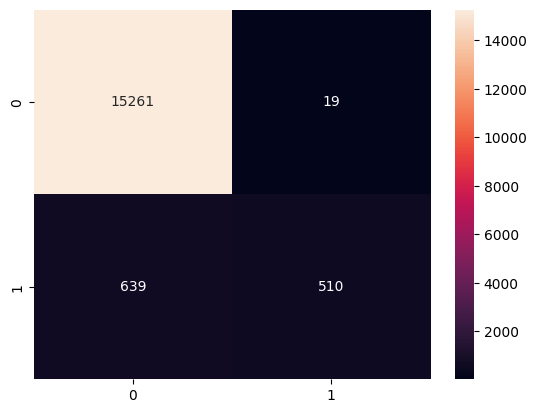

In [46]:
sns.heatmap(cm, annot=True, fmt='.6g')

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, RocCurveDisplay
round(accuracy_score(y_test, y_pred), 2)

0.96

In [48]:
y_pred_p = model_fin.predict_proba(X_test)

In [49]:
roc_auc_score(y_test, y_pred)

0.7213103871338155

In [51]:
precision = precision_score(y_test, y_pred)
precision

0.9640831758034026

In [52]:
f1 = f1_score(y_test, y_pred)
f1

0.6078665077473181

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [54]:
roc_auc = auc(fpr, tpr)
roc_auc

0.7213103871338155

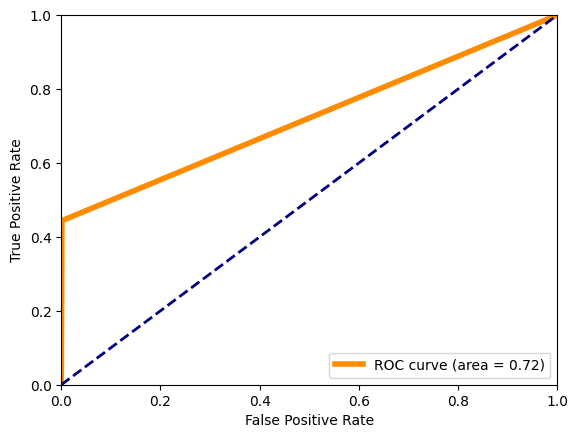

In [55]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=4,  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc='lower right')
plt.show()